<a href="https://colab.research.google.com/github/doodger/dataScience/blob/master/finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Under construction
This project seeks to compare historical American demographic trends and S&P 500 trends

In [0]:
#General Imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn



In [2]:
#Data imports
populationURL = "https://raw.githubusercontent.com/doodger/dataScience/master/38f6e261-94a4-4bdf-b5db-5d75022e46bb_Data.csv"
SaP500URL = "https://raw.githubusercontent.com/doodger/dataScience/master/%5EGSPC.csv"

pop_df = pd.read_csv(populationURL)
sap_df = pd.read_csv(SaP500URL)

##Data cleaning and sorting for the population

#Demographics data
pop_df.head()
#Rows 35,36 and 37 are rows of Nan
#Rows 38 and 39 only have a value at the head, detailling the database's World bank origin

print("Total missing value for rows 0 to 34:",pop_df.loc[0:34].isnull().sum().sum())
pop_df = pop_df.loc[0:34]

#With the un-needed rows cut off, the dataframe can be reordered so that the rows of population groups
#    are in chronological order
pop_df = pop_df.sort_values("Series Code")
#Row 21 is superfluous (65+ women), and can be deleted. The index are then labeled to a proper order
pop_df = pop_df.drop([21])
pop_df.index= [i for i in range(34)]
#The 17 age groups are now in ascending order for both women and men

Total missing value for rows 0 to 34: 0


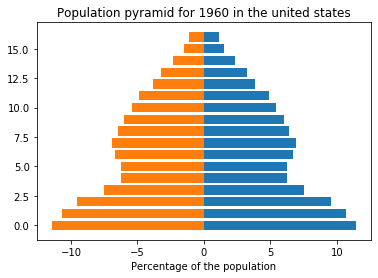

In [3]:
##Visualization

#Sample age pyramid for 1960
yMen = [pop_df.loc[i,"1960 [YR1960]"] for i in range(1,34,2)]
yWomen = [-pop_df.loc[i,"1960 [YR1960]"] for i in range(1,34,2)]
#Here the women's number will be in the negative by convention


x = [i for i in range(17)]
ax = plt.subplot(111)
ax.barh(x,yMen)
ax.barh(x,yWomen)
plt.xlabel("Percentage of the population")
ax.set_title("Population pyramid for 1960 in the united states")
plt.show()


Total missing value for S&P data: 0


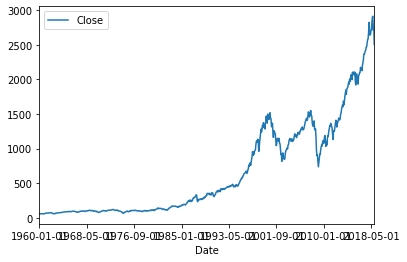

In [53]:
#Financial data
sap_df.head()
print("Total missing value for S&P data:",sap_df.isnull().sum().sum())
#The population data only extends to 2018, and so the 2019 data of the S&P can be cut
#2019 data is from row 708 onward
sap_df = sap_df.loc[0:707]

#History of the S&P500 
sap_df.plot.line(x="Date",y="Close")

## Creating a joint dataset
#Turning the monthly stock market data into annualized data to compare it with the population will be helpful
#To do this a set of yearly statistics for the S&P data will be calculated and afterward both dataframes will be merged into one consolidated dataframe


colAvgClose = [0]*59
colYear = [0]*59
colVolatility = [0]*59
colVolume = [0]*59
colYearlyPercentageVariation = [0]*59
#populating each of the 59 years
for i in range(59):
  colAvgClose[i] = sap_df.loc[i:i+11,"Close"].mean() #yearly mean of closing price
  colVolatility[i] = sap_df.loc[i:i+11,"Close"].std()
  colVolume[i] = sap_df.loc[i:i+11,"Close"].mean()

for i in range(1,59):#1960 has no previous year data and thus no percentage variation for now
  colYearlyPercentageVariation[i] = (colAvgClose[i]-colAvgClose[i-1])/colAvgClose[i-1]

#Columns from the S&P set

columns = []
columns.append( ("year", [1960 + i for i in range(59)]) )
columns.append( ("avgClose", colAvgClose) )
columns.append( ("volatility", colVolatility) )
columns.append( ("volume", colVolume) )
columns.append( ("yearPctVar", colYearlyPercentageVariation))
#Columns from the pop set
pop_columns = ["0t4F","0t4M","5t9F","5t9M","10t14F","10t14M","15t19F","15t19M",
               "20t24F","20t24M","25t29F","25t29M","30t34F", "30t34M","35t39F",
                "35t39M","40t44F", "40t44M","45t49F","45t49M",
           "50t54F","50t54M","55t59F","55t59M","60t64F", "60t64M","65t69F","65t69M",
           "70t74F","70t74M",
           "75t79F","75t79M","80pF","80pM"]
for i in range(34):
  columns.append( (pop_columns[i], pd.to_numeric(pop_df.loc[i,"1960 [YR1960]":"2018 [YR2018]"]) ) ) #columns were being copied as object instead of numeric

#creating the joint dataframe
merged_df = pd.DataFrame(dict(columns))
merged_df.index = [i for i in range(59)] #To get rid of inherited index names from pop_df


## Exploratory data analysis
Ideas:

*  Volume?
*  Price increase?
*  Correlation between upward/downward mobility and # of youth/old



In [54]:

corrMatrix = merged_df.corr()#.loc[0:5,"year":"5t9M"].corr() #corr matrix of the merged df
corrMatrix.style.background_gradient(cmap='coolwarm', axis=None)

#merged_df.plot.scatter(x="20t24M", y="avgClose")
#merged_df.plot.scatter(x="20t24F", y="avgClose")
#merged_df.plot.scatter(x="0t4M", y="avgClose")
#merged_df.plot.scatter(x="80pM", y="avgClose")

In [6]:
merged_df


,year,avgClose,volatility,0t4F,0t4M,5t9F,5t9M,10t14F,10t14M,15t19F,15t19M,20t24F,20t24M,25t29F,25t29M,30t34F,30t34M,35t39F,35t39M,40t44F,40t44M,45t49F,45t49M,50t54F,50t54M,55t59F,55t59M,60t64F,60t64M,65t69F,65t69M,70t74F,70t74M,75t79F,75t79M,80pF,80pM
0,1960,55.601666,1.382296,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869,10.774869
1,1961,56.115833,2.256657,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331,10.702331
2,1962,56.725833,3.092449,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417,10.506417
3,1963,57.535833,3.871343,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987,10.219987
4,1964,58.447499,4.320162,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075,9.899075
5,1965,59.341666,4.811621,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512,9.584512
6,1966,59.984999,4.971830,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697,9.235697
7,1967,60.922499,5.110045,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760,8.910760
8,1968,61.848333,5.328632,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060,8.617060
9,1969,62.949166,4.788861,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535,8.350535


In [30]:
pop_df

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,"Population ages 00-04, female (% of female pop...",SP.POP.0004.FE.5Y,United States,USA,10.774869,10.702331,10.506417,10.219987,9.899075,9.584512,9.235697,8.910760,8.617060,8.350535,8.100189,7.799372,7.600970,7.469559,7.362556,7.252136,7.202170,7.112239,7.002040,6.910515,6.867757,6.876831,6.910670,6.966584,7.028823,7.087749,7.182306,7.241570,7.273849,7.292919,7.309832,7.346439,7.355884,7.339861,7.296726,7.234308,7.189663,7.073344,6.923363,6.787529,6.690256,6.558055,6.531849,6.570198,6.614098,6.630659,6.741331,6.755742,6.698296,6.610690,6.526967,6.467645,6.362248,6.236285,6.113216,6.007935,5.866953,5.795027,5.771755,..
1,"Population ages 00-04, male (% of male populat...",SP.POP.0004.MA.5Y,United States,USA,11.438166,11.381676,11.183908,10.882823,10.542620,10.213357,9.870731,9.543363,9.245412,8.976671,8.724320,8.388076,8.177711,8.048276,7.948372,7.848318,7.864952,7.813111,7.720250,7.634696,7.596415,7.621108,7.635797,7.652222,7.674480,7.709322,7.780021,7.840630,7.893146,7.935835,7.966594,8.000111,8.001336,7.971546,7.912667,7.835477,7.770706,7.634558,7.467083,7.316991,7.207258,7.053757,7.019719,7.058023,7.103122,7.118419,7.236971,7.250671,7.186521,7.090433,6.999510,6.930155,6.812623,6.673860,6.538405,6.422082,6.269949,6.190469,6.162448,..
2,"Population ages 05-09, female (% of female pop...",SP.POP.0509.FE.5Y,United States,USA,10.024583,10.045332,10.078252,10.116666,10.135845,10.102421,10.026761,9.897738,9.718796,9.506571,9.286653,9.045226,8.761247,8.446217,8.126254,7.835540,7.588996,7.387259,7.229232,7.098332,6.968899,6.877060,6.799735,6.735890,6.686307,6.651909,6.672454,6.709877,6.758001,6.806680,6.843446,6.918077,6.983289,7.032450,7.062028,7.069656,7.110421,7.144932,7.164363,7.158634,7.118956,7.057807,6.945836,6.789031,6.614785,6.462138,6.407140,6.397430,6.421688,6.452784,6.453346,6.419142,6.394570,6.378205,6.361228,6.330329,6.283392,6.200687,6.088195,..
3,"Population ages 05-09, male (% of male populat...",SP.POP.0509.MA.5Y,United States,USA,10.641427,10.672017,10.721493,10.778797,10.813815,10.787300,10.727475,10.616675,10.456994,10.262220,10.054972,9.789824,9.471474,9.112358,8.744800,8.411886,8.222310,8.072812,7.955879,7.849469,7.723233,7.596469,7.502943,7.439320,7.396304,7.359963,7.353492,7.363815,7.388504,7.421878,7.456087,7.528291,7.591452,7.640454,7.670715,7.677564,7.713601,7.741011,7.752574,7.738596,7.690536,7.620729,7.491496,7.312122,7.114233,6.941388,6.876859,6.862512,6.886885,6.919976,6.920136,6.877537,6.846399,6.824311,6.801714,6.764784,6.712602,6.622880,6.501650,..
4,"Population ages 10-14, female (% of female pop...",SP.POP.1014.FE.5Y,United States,USA,8.970117,9.118514,9.219836,9.287382,9.344493,9.409482,9.493930,9.572914,9.636842,9.666254,9.645391,9.596907,9.498462,9.360114,9.187051,8.976447,8.730075,8.455317,8.164912,7.881106,7.623932,7.419192,7.245206,7.096513,6.963857,6.841278,6.754607,6.689391,6.643560,6.615697,6.604138,6.622758,6.663403,6.718742,6.779507,6.836298,6.882271,6.933124,6.986104,7.036461,7.078776,7.107187,7.121584,7.122815,7.099895,7.035330,6.924649,6.801826,6.680703,6.582490,6.521026,6.454772,6.399160,6.348837,6.299850,

TODO


*   better age pyramid (inverse y axis, positive label instead of negative for women)
*   Monthly volatility into yearly volatility?
*   Price needs to be in % variation I think
*   Should first column of percentage variation be 0 or N/A? look up from previous year?
*   give yearpctvar a proper name without breaking heatmap?

